### Part 1 - Product Specifications

***Problem Statement*** - Provided with Uber's 2021 financial statement Form 10-K & HDFC Bank Life Insurance policy statements. Our goal here is to build a RAG application on the annual financial statement pdf and life insurance policy documents.

***Solution Strategy*** - Build a project which should solve the following requirements:

- Users would get responses from the financial statement & the Life Insurance policy statements.
- If they want to refer to the original page from which the bot is responding, the bot should provide a citation as well.

Goal - Solving the above two requirements well in the project would ensure that the accuracy of the overall model is good and therefore further improvisations and customizations make sense.

***Data Used*** - Annual financial statement / life insurance documents stored in a single folder

***Tools used*** - LlamaIndex has been used due to its powerful query engine, fast data processing using data loaders and directory readers as well as easier and faster implementation using fewer lines of code. Also, if we want to process heavy documents for RAG application then LlamaIndex provides various custom settings such as override chunk sizes, metadata filters for exact search, prompt engineering & overrding embedding model

### Part 2 - Solution

In this section, we go ahead and actually build the solution that we proposed in the previous step

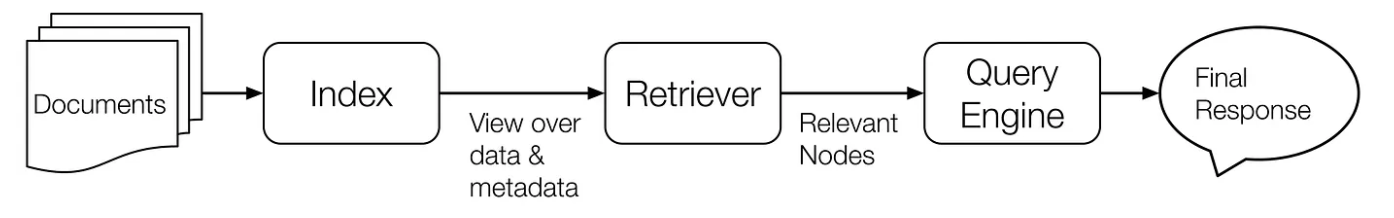

##### Step 1 : Import the necessary libraries

In [227]:
!pip install llama-index

In [228]:
pip show llama-index

Name: llama-index
Version: 0.12.43
Summary: Interface between LLMs and your data
Home-page: 
Author: 
Author-email: Jerry Liu <jerry@llamaindex.ai>
License: 
Location: /Users/sahilavasthi/Anaconda/anaconda3/lib/python3.10/site-packages
Requires: llama-index-agent-openai, llama-index-cli, llama-index-core, llama-index-embeddings-openai, llama-index-indices-managed-llama-cloud, llama-index-llms-openai, llama-index-multi-modal-llms-openai, llama-index-program-openai, llama-index-question-gen-openai, llama-index-readers-file, llama-index-readers-llama-parse, nltk
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [229]:
## Document loaders for SimpleDirectoryReader
!pip install docx2txt
!pip install pypdf
## Install openai
!pip install openai

In [230]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

In [231]:
# Set up OpenAI API key
# Make sure to replace 'your_api_key_here' with your actual OpenAI API key
# Alternatively, you can set the API key in your environment variables
# or use a file to store the key securely.
filepath = '/Users/sahilavasthi/upGrad/genai/'

with open(filepath + "OpenAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

os.environ['OPENAI_API_KEY'] = openai.api_key.strip()

##### Step 2 - Data Loading

***3 ways to do this***

- If we have a single file containing all the required data, use a data loader from [LLamahub](https://llamahub.ai/)

https://llamahub.ai/l/readers/llama-index-readers-file

- If we have multiple files, use *Simple Directory Reader* Just ensure that for reading each file type the necessary dependency libraries are already installed.
    - https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader.html

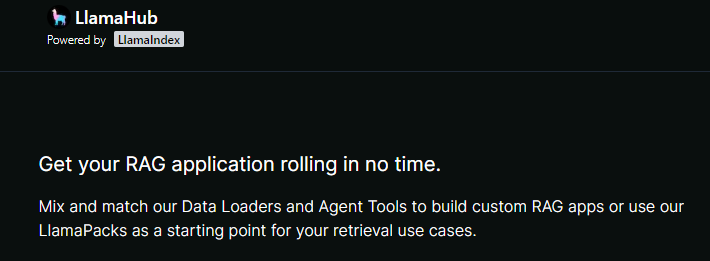

- Llamaparse: A very recent method for parsing documents. This is claimed as the first **GenAI native document parsing platform** .

    - [LinkedIN Post](https://www.linkedin.com/posts/llamaindex_were-excited-to-officially-launch-llamaparse-activity-7173714437860782080-Zqmf)

    - [Blog Post](https://www.llamaindex.ai/blog/launching-the-first-genai-native-document-parsing-platform)

**Recommendation** - No matter how powerful the given data loader is, ensure that your file is properly formatted, and the loader is able to read the file clearly. Else the query engine might fail.

In [232]:
from llama_index.core import SimpleDirectoryReader
reader = SimpleDirectoryReader(input_dir="/Users/sahilavasthi/upGrad/genai/AI_SemanticSpotter/data")

In [233]:
# Load documents from the specified directory
# This will read all text files in the directory and return a list of Document objects
# You can also specify other file types like .pdf, .docx, etc. if you have the necessary loaders installed
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 381 docs


In [234]:
# Display the type of documents loaded
type(documents)

list

In [235]:
# Display the first document
documents[1]

Document(id_='4ce0fa9d-ca3a-4b10-8669-0637383639fd', embedding=None, metadata={'page_label': '2', 'file_name': 'HDFC-Life-Group-Term-Life-Policy.pdf', 'file_path': '/Users/sahilavasthi/upGrad/genai/AI_SemanticSpotter/data/HDFC-Life-Group-Term-Life-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 874679, 'creation_date': '2025-06-23', 'last_modified_date': '2025-06-23'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text=' \nF&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 1                        \n \n \nPART A: Covering Letter with Policy Schedule \n                                                              

##### Step 3 - Building the query engine using the `defaults` and `VectorStoreIndex`

In [236]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

# # build index
index = VectorStoreIndex(nodes)

# Construct Query Engine
query_engine = index.as_query_engine()

In [237]:
# Display the query engine
display(HTML("<h3>Query Engine</h3>"))
display(query_engine)
type(index)

llama_index.core.indices.vector_store.base.VectorStoreIndex

In [238]:
# Now you can use the query engine to ask questions about the documents
# For example, you can ask about the revenue of Uber in 2021
print("Querying the index for information about HDFC's Group Life Term Insurance in 2021...")
response = query_engine.query("What is the Age Eligibility for Members?")

Querying the index for information about HDFC's Group Life Term Insurance in 2021...


In [239]:
# Display the response
type(response)

llama_index.core.base.response.schema.Response

In [240]:
# Display the response text
print("Response from the query engine:")
response.response

Response from the query engine:


'The specific minimum and maximum age at entry, as well as the maximum maturity age for members, are not provided in the available information.'

In [241]:
# Display the metadata of the response
print("Metadata of the response:")
for key, value in response.metadata.items():
    print(f"  {key}: {value}")

Metadata of the response:
  b0be0633-2f73-4ba2-bb58-746277e88724: {'page_label': '6', 'file_name': 'HDFC-Life-Group-Term-Life-Policy.pdf', 'file_path': '/Users/sahilavasthi/upGrad/genai/AI_SemanticSpotter/data/HDFC-Life-Group-Term-Life-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 874679, 'creation_date': '2025-06-23', 'last_modified_date': '2025-06-23'}
  4fd61faa-7901-4fcd-99d2-445a28358276: {'page_label': '15', 'file_name': 'HDFC-Life-Group-Term-Life-Policy.pdf', 'file_path': '/Users/sahilavasthi/upGrad/genai/AI_SemanticSpotter/data/HDFC-Life-Group-Term-Life-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 874679, 'creation_date': '2025-06-23', 'last_modified_date': '2025-06-23'}


In [242]:
# Display the source nodes of the response
print("Source nodes of the response:")
for node in response.source_nodes:
    print(f"  Node ID: {node.node_id}, Text: {node.text}")

Source nodes of the response:
  Node ID: b0be0633-2f73-4ba2-bb58-746277e88724, Text: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 5                        
 
 
 
Age Eligibility for Members  
 
Minimum at Entry: ….. Years as on last Birthday 
Maximum at Entry: ….. Years as on last Birthday 
 
Maximum Maturity Age: ….. th  Birthday 
 
 
Number of Lives 
 
For Employer – Employee 
For Non Employer – Employee 
 
 
Free Cover Limit (Base Plan) 
 
 
 
 
Free Cover Limit (Riders) 
 
 
 
Premium Rate (Base Plan) 
 
 
 
Premium Rate (Riders) 
 
 
 
Premium Amount (Base Plan) 
 
 
 
 
Premium Amount (Riders) 
 
 
 
 
Service Tax Amount (Base Plan) 
 
 
 
Service Tax Amount (Riders) 
 
 
 
Applicable Cess 
 
 
 
Total Amount
  Node ID: 4fd61faa-7901-4fcd-99d2-445a28358276, Text: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 14                        
 
 
F.3.3.2 The application for cover and details of member information shall be in a Performa

In [243]:
# Response node text
response.source_nodes[0].node.text

'F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 5                        \n \n \n \nAge Eligibility for Members  \n \nMinimum at Entry: ….. Years as on last Birthday \nMaximum at Entry: ….. Years as on last Birthday \n \nMaximum Maturity Age: ….. th  Birthday \n \n \nNumber of Lives \n \nFor Employer – Employee \nFor Non Employer – Employee \n \n \nFree Cover Limit (Base Plan) \n \n \n \n \nFree Cover Limit (Riders) \n \n \n \nPremium Rate (Base Plan) \n \n \n \nPremium Rate (Riders) \n \n \n \nPremium Amount (Base Plan) \n \n \n \n \nPremium Amount (Riders) \n \n \n \n \nService Tax Amount (Base Plan) \n \n \n \nService Tax Amount (Riders) \n \n \n \nApplicable Cess \n \n \n \nTotal Amount'

##### Step 4 - **Verify** `Vector Stores` usage with a query and a response

As we know in indexing, one of the most common types of Index is the VectorStoreIndex. The API calls to create the embeddings in a VectorStoreIndex can be expensive in terms of time and money, so you will want to store them to avoid having to constantly re-index things.

LlamaIndex supports a huge number of vector stores which vary in architecture, complexity and cost. In this example we'll be using Chroma, an open-source vector store.

In [244]:
# Install ChromaDB and LlamaIndex vector stores for Chroma
# ChromaDB is a vector database that can be used with LlamaIndex for efficient vector
!pip install chromadb
%pip install llama-index-vector-stores-chroma

Note: you may need to restart the kernel to use updated packages.


In [245]:
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext

db_path = "/Users/sahilavasthi/upGrad/genai/AI_SemanticSpotter/storage/chroma_db"

# Fix permissions using a shell command (run this once if you get a readonly error)
import os
if not os.access(db_path, os.W_OK):
    # This will recursively add write permissions for the user
    !chmod -R u+w /Users/sahilavasthi/upGrad/genai/AI_SemanticSpotter/storage/chroma_db

# initialize client, setting path to save data
db = chromadb.PersistentClient(path=db_path)

# create collection
chroma_collection = db.get_or_create_collection("quickstart_collection")

# assign chroma as the vector_store to the context
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

# create your index
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

# create a query engine and query
query_engine = index.as_query_engine()
# Query the index for information about Uber's revenue in 2021
response = query_engine.query("What is the revenue of uber in 2021?")
print('Verifying the response from the query engine...')
print(response)


Verifying the response from the query engine...
The revenue of Uber in 2021 was $17,455 million.


##### Step 5 - As we get good response at `Step 4)` Therefore, Lets customize the `chunk size or chunk overlap, llm model and a new collection in the vector stores` **because of the benefits listed below**

- The API calls to create the embeddings in a VectorStoreIndex can be expensive in terms of time and money, so we will want to store them to avoid having to constantly re-index things. When documents are added to an index, they are divided into chunks with a specified overlap. By default, the chunk size is set to 1024 tokens, and the chunk overlap is 20 tokens.

- Adjusting these values will affect how embeddings are generated. Using a smaller chunk size results in more fine-grained and precise embeddings, while a larger chunk size produces more general embeddings that may overlook specific details.

- Additionally, if we modify the chunk size for a vector index, consider increasing the `similarity_top_k` parameter. This helps ensure that an appropriate amount of relevant data is retrieved for each query.

In [246]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

##Initialize the OpenAI model, with specific parameters
Settings.llm = OpenAI(model="gpt-4.1-mini", temperature=0, max_tokens=256)

##Initialize the embedding model
Settings.embed_model = OpenAIEmbedding()

## Initialize the node_parser with the custom node settings
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)

## Initialize the num_output and the context window
Settings.num_output = 512
Settings.context_window = 3900
# Re-initialize the vector store with the new settings
# create collection
chroma_collection = db.get_or_create_collection("uber_and_insurance_policies")

# assign chroma as the vector_store to the context
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

# create your index
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

# Initialize a query engine for the index with a specified similarity top-k value
query_engine = index.as_query_engine(similarity_top_k=3)
response = query_engine.query("What is the revenue of uber in 2021?")
print(response)

The revenue of Uber in 2021 was $17,455 million.


##### Step 6 - **Verify** LLM for better retrieval augmented generation text

In [247]:
query='Which services gave uber the most revenue?'
response = query_engine.query(query)
# As we can see, the response is not that detailed; however, it includes information about the services that contributed to Uber's revenue.
print(f"Query: {query}")
print("Response from the query engine:")
print(response.response)


Query: Which services gave uber the most revenue?
Response from the query engine:
The service that generated the most revenue for Uber was Mobility, followed by Delivery and then Freight.


In [248]:
# Check the length of the source nodes in the response
print("Number of source nodes in the response:")
print(len(response.source_nodes))

Number of source nodes in the response:
1


In [249]:
# Write the retrieved text from the source nodes to a variable. 
# Create code to generate the dynamic text from the source nodes
def get_retrieved_text(response):
    retrieved = ""
    num_nodes = len(response.source_nodes)
    if num_nodes == 0:
        return "No relevant information found in the source nodes."
    
    for i in range(num_nodes):
        retrieved += response.source_nodes[i].node.text
    return retrieved

In [250]:
# Define a function called moderation_check that takes user_input as a parameter.
def moderation_check(user_input):
    # Call the OpenAI API to perform moderation on the user's input.
    response = openai.moderations.create(input=user_input, model="omni-moderation-latest")

    # Extract the moderation result from the API response.
    moderation_output = response.results[0].flagged
    # Check if the input was flagged by the moderation system.
    if moderation_output == True:
        # If flagged, return "Flagged"
        return "Flagged"
    else:
        # If not flagged, return "Not Flagged"
        return "Not Flagged"

In [251]:
# Define the function to generate the response. Provide a comprehensive prompt that passes the user query and the top 3 results to the model

def generate_response(query, retrieved):
    """
    Generate a response using GPT-4's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
    {"role":"system", "content":"You are a helpful AI assistant in the uber and health life insurance domains who can effectively answer user queries about uber related financial form 10-k and HDFC life insurance policies and documents."},
    {"role":"user", "content": f"""You are a helpful assistant in the uber and health life insurance domain who can effectively answer user queries about uber, insurance policies and documents.
                                                You have a question asked by the user in '{query}' and you have some search results from a corpus of insurance documents in the dataframe '{retrieved}'. These search results are essentially one page of an insurance document that may be relevant to the user query.

                                                Use the documents in '{retrieved}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant policy names and page numbers as citations.

                                                Follow the guidelines below when performing the task.
                                                1. Try to provide relevant/accurate numbers if available.
                                                2. You don’t have to necessarily use all the information in the retriever. Only choose information that is relevant.
                                                3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular in format.
                                                3. Use the Metadatas columns in the dataframe to retrieve and cite the policy name(s) and page numbers(s) as citation.
                                                4. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited documents.
                                                5. You are a customer facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                                The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.
                                                """},
          ]

    response = openai.chat.completions.create(
        model="gpt-4.1-mini",
        messages=messages
    )

    return response.choices[0].message.content.split('\n')

In [252]:
# Generate the response
moderation = moderation_check(query)
responses = None
if moderation == 'Flagged':
    display("Sorry, this message has been flagged. Please restart your conversation.")
else:
    responses = generate_response(query, get_retrieved_text(response))

In [253]:
# Print the response

print("\n".join(responses))

Uber's services that generated the most revenue over the years 2019 to 2021 were primarily from Mobility and Delivery, with Freight and All Other revenues contributing less substantially. Here are the revenues (in millions) by service for each year:

| Year | Mobility Revenue | Delivery Revenue | Freight Revenue | All Other Revenue | Total Revenue |
|-------|------------------|------------------|-----------------|-------------------|---------------|
| 2019  | $10,707          | $1,401           | $731            | $161              | $13,000       |
| 2020  | $6,089           | $3,904           | $1,011          | $135              | $11,139       |
| 2021  | $6,953           | $8,362           | $2,132          | $8                | $17,455       |

- Mobility revenue mainly comes from fees paid by drivers and some end-users for rides through Uber’s platform.
- Delivery revenue is derived from merchants’ and couriers’ use of the delivery platform, plus delivery fees charged to end-use

##### Step 7 - As we get good response at `Step 6)`. Therefore, Finally build a Testing Pipeline combining `Step 5 & Step 6`
Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

In [ ]:
## Query response function
def query_response(user_input):
    moderation = moderation_check(user_input)
    if moderation == 'Flagged':
        display("Sorry, this message has been flagged. Please restart your conversation.")
        return None
    response = query_engine.query(user_input)
    retrieved = get_retrieved_text(response)
    final_response = ""
    for i in range(len(response.source_nodes)):
        file_name = (
            response.source_nodes[i].node.metadata['file_name']
            + " page nos "
            + response.source_nodes[i].node.metadata['page_label']
            + ","
            + response.source_nodes[i].node.metadata['page_label']
        )
        # Join the list returned by generate_response into a string
        generated = "\n".join(generate_response(user_input, retrieved))
        final_response = generated + '\nCheck further at ' + file_name
    return final_response

In [255]:
questions = ['What was uber revenue in 2021?',
             "Which services gave uber the most revenue",
             'What was uber loss in 2021?',
             'What is the Age Eligibility for Members?',
             'What is the process for surrendering the policy?'
             ]

In [256]:
import pandas as pd

def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    page = query_response(i).split()[-1]
    test_feedback.append((i,query_response(i),page,user_input))

  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Good or Bad'])
  return feedback_df

In [257]:
testing_pipeline(questions)

What was uber revenue in 2021?
Uber's total revenue in 2021 was $17,455 million. This total revenue comprises $9,058 million from the United States and $8,397 million from all other countries.

Here is a summary of Uber's revenue for the year ended December 31, 2021:

| Region          | Revenue (in million USD) |
|-----------------|--------------------------|
| United States   | 9,058                    |
| All other countries | 8,397                 |
| **Total Revenue** | **17,455**              |

If you want to explore more detailed financial information, you can refer to the section titled "Year Ended December 31" in the Uber financial documents.

Citation: Uber financial document, Year Ended December 31, 2021, page number as per the original source document.
Check further at uber_2021.pdf page nos 129,129

 Please provide your feedback on the response provided by the bot
Which services gave uber the most revenue
Uber's revenue primarily comes from four service categories: Mobili

,Question,Response,Page,Good or Bad
0,What was uber revenue in 2021?,"Uber's total revenue in 2021 was $17,455 milli...","129,129",Good
1,Which services gave uber the most revenue,Uber's revenue primarily comes from the follow...,"98,98",Good
2,What was uber loss in 2021?,"In 2021, Uber Technologies, Inc. reported a ne...","78,78",Good
3,What is the Age Eligibility for Members?,The Age Eligibility for Members as per the pro...,"6,6",Good
4,What is the process for surrendering the policy?,"To surrender your insurance policy, the proces...","39,39",Good
